In [10]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
supermarket_data = pd.read_csv('SuperMarket Analysis.csv')
supermarket_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [3]:
supermarket_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### Step 1: Preprocessing the dataset

In [4]:
from sklearn.preprocessing import LabelEncoder

columns_to_transform = ['Branch', 'City', 'Customer type', 'Gender', 'Payment', 'Product line']

label_encoders = {}
for col in columns_to_transform:
    le = LabelEncoder()
    supermarket_data[col] = le.fit_transform(supermarket_data[col])
    label_encoders[col] = le

supermarket_data.drop(['Invoice ID', 'Date', 'Time'], axis=1, inplace=True)

In [5]:
supermarket_data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,0,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,0,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,0,0,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4
997,0,2,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7
998,0,2,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1


### Step 2: Visualization of trends in all numerical columns

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = supermarket_data.select_dtypes(include=[np.number]).columns.tolist()
supermarket_data[numerical_columns]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,0,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,0,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,0,0,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4
997,0,2,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7
998,0,2,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1


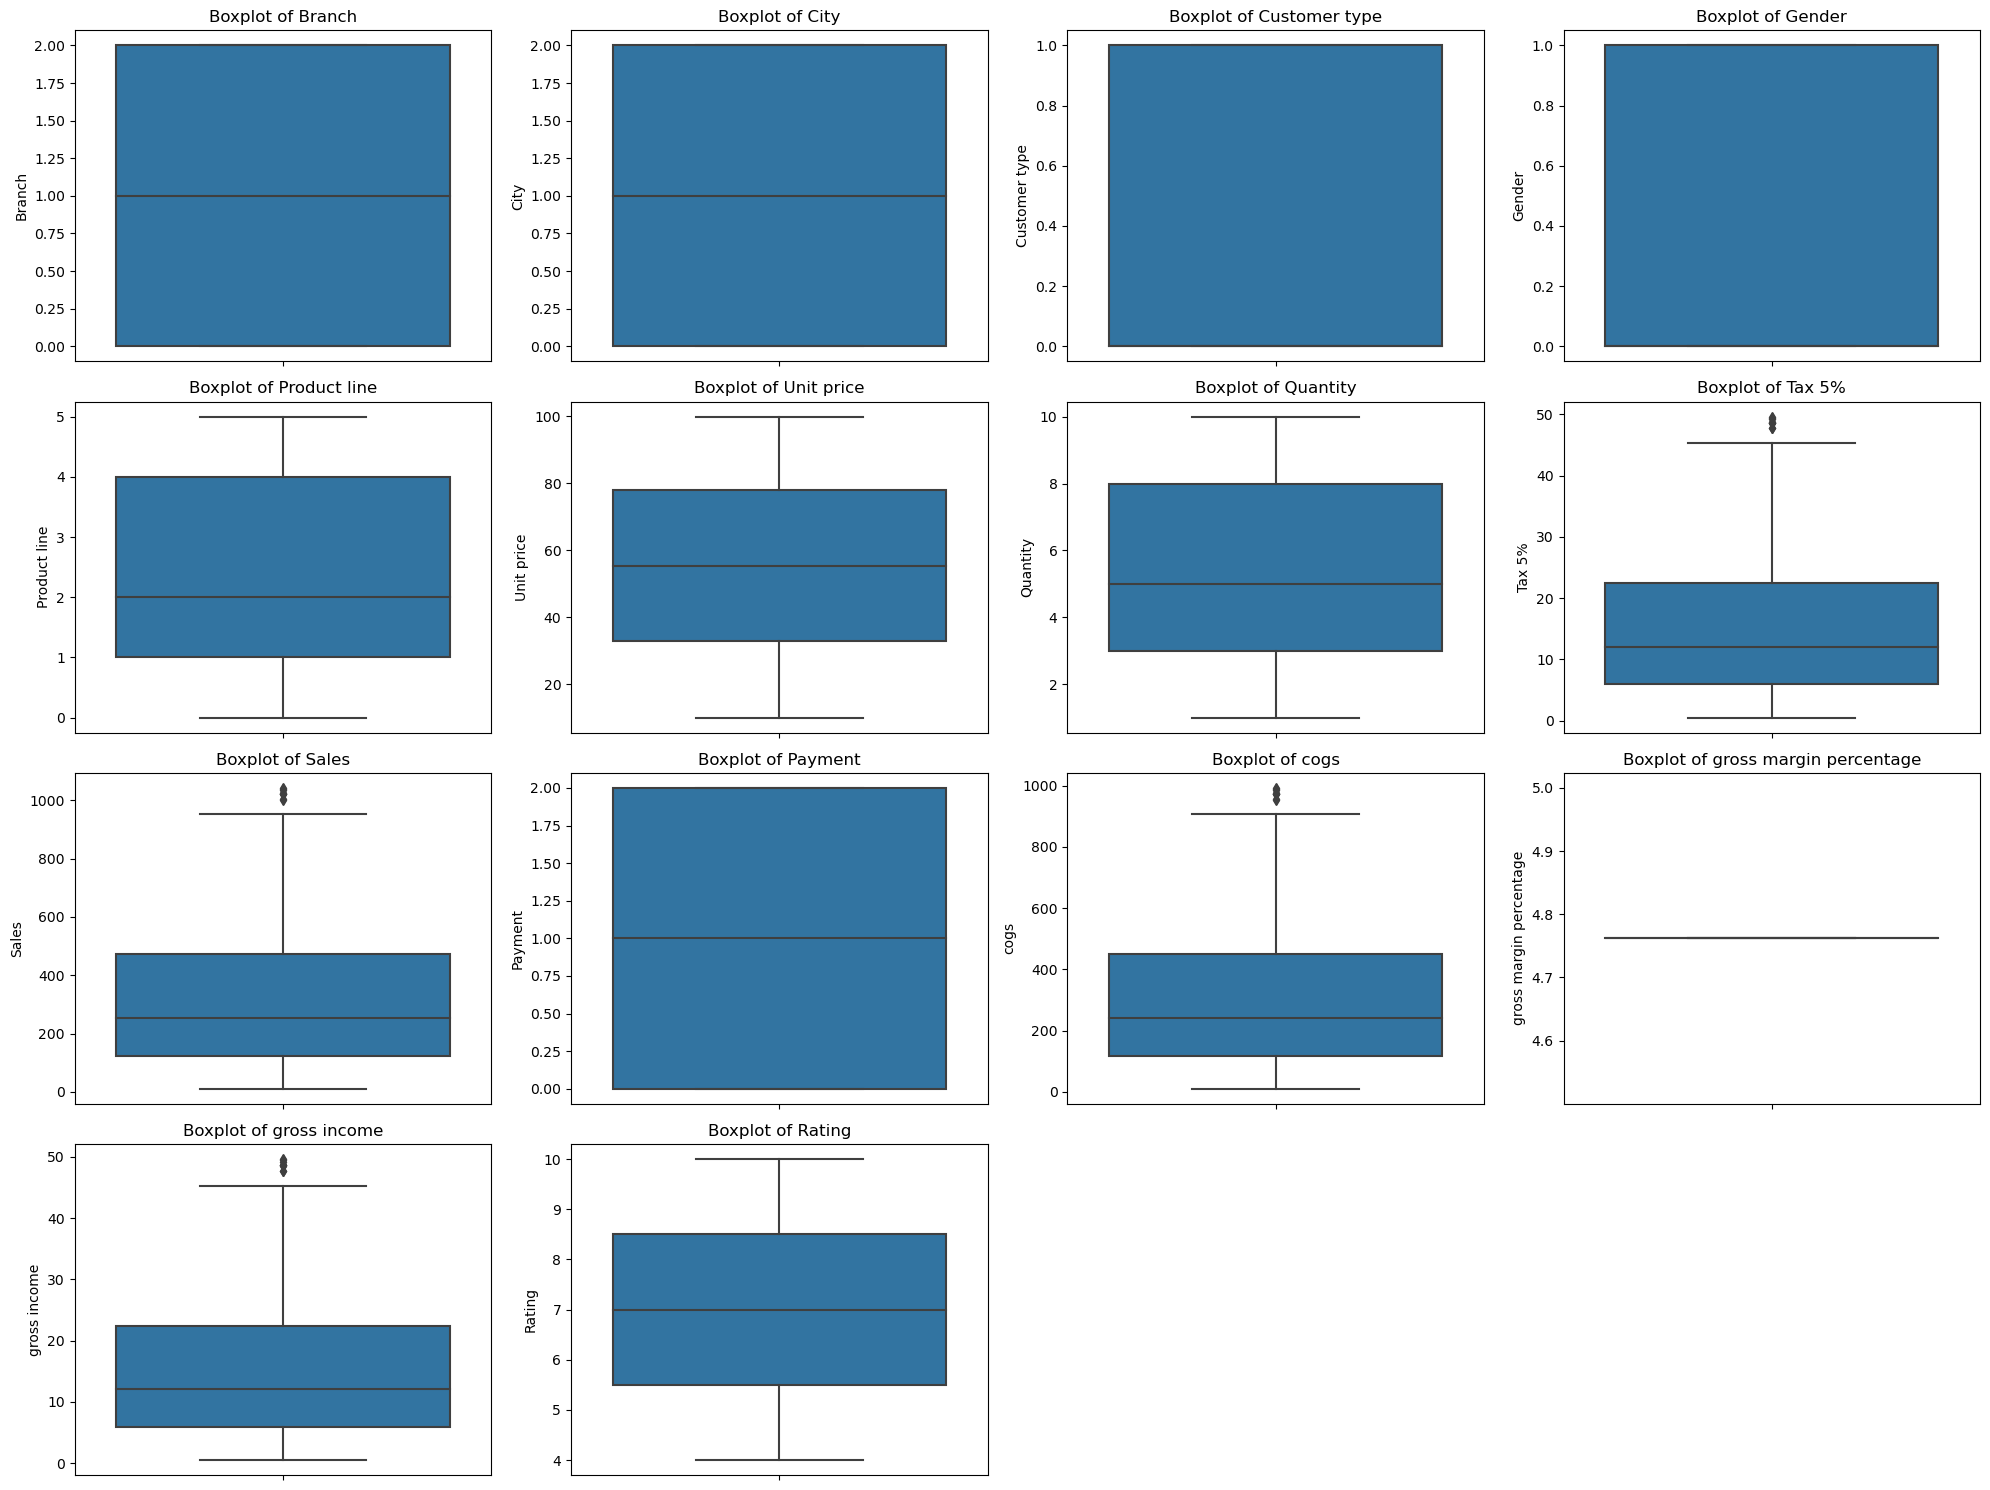

In [11]:
plt.figure(figsize=(20, 15)) 
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  
    sns.boxplot(y=supermarket_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

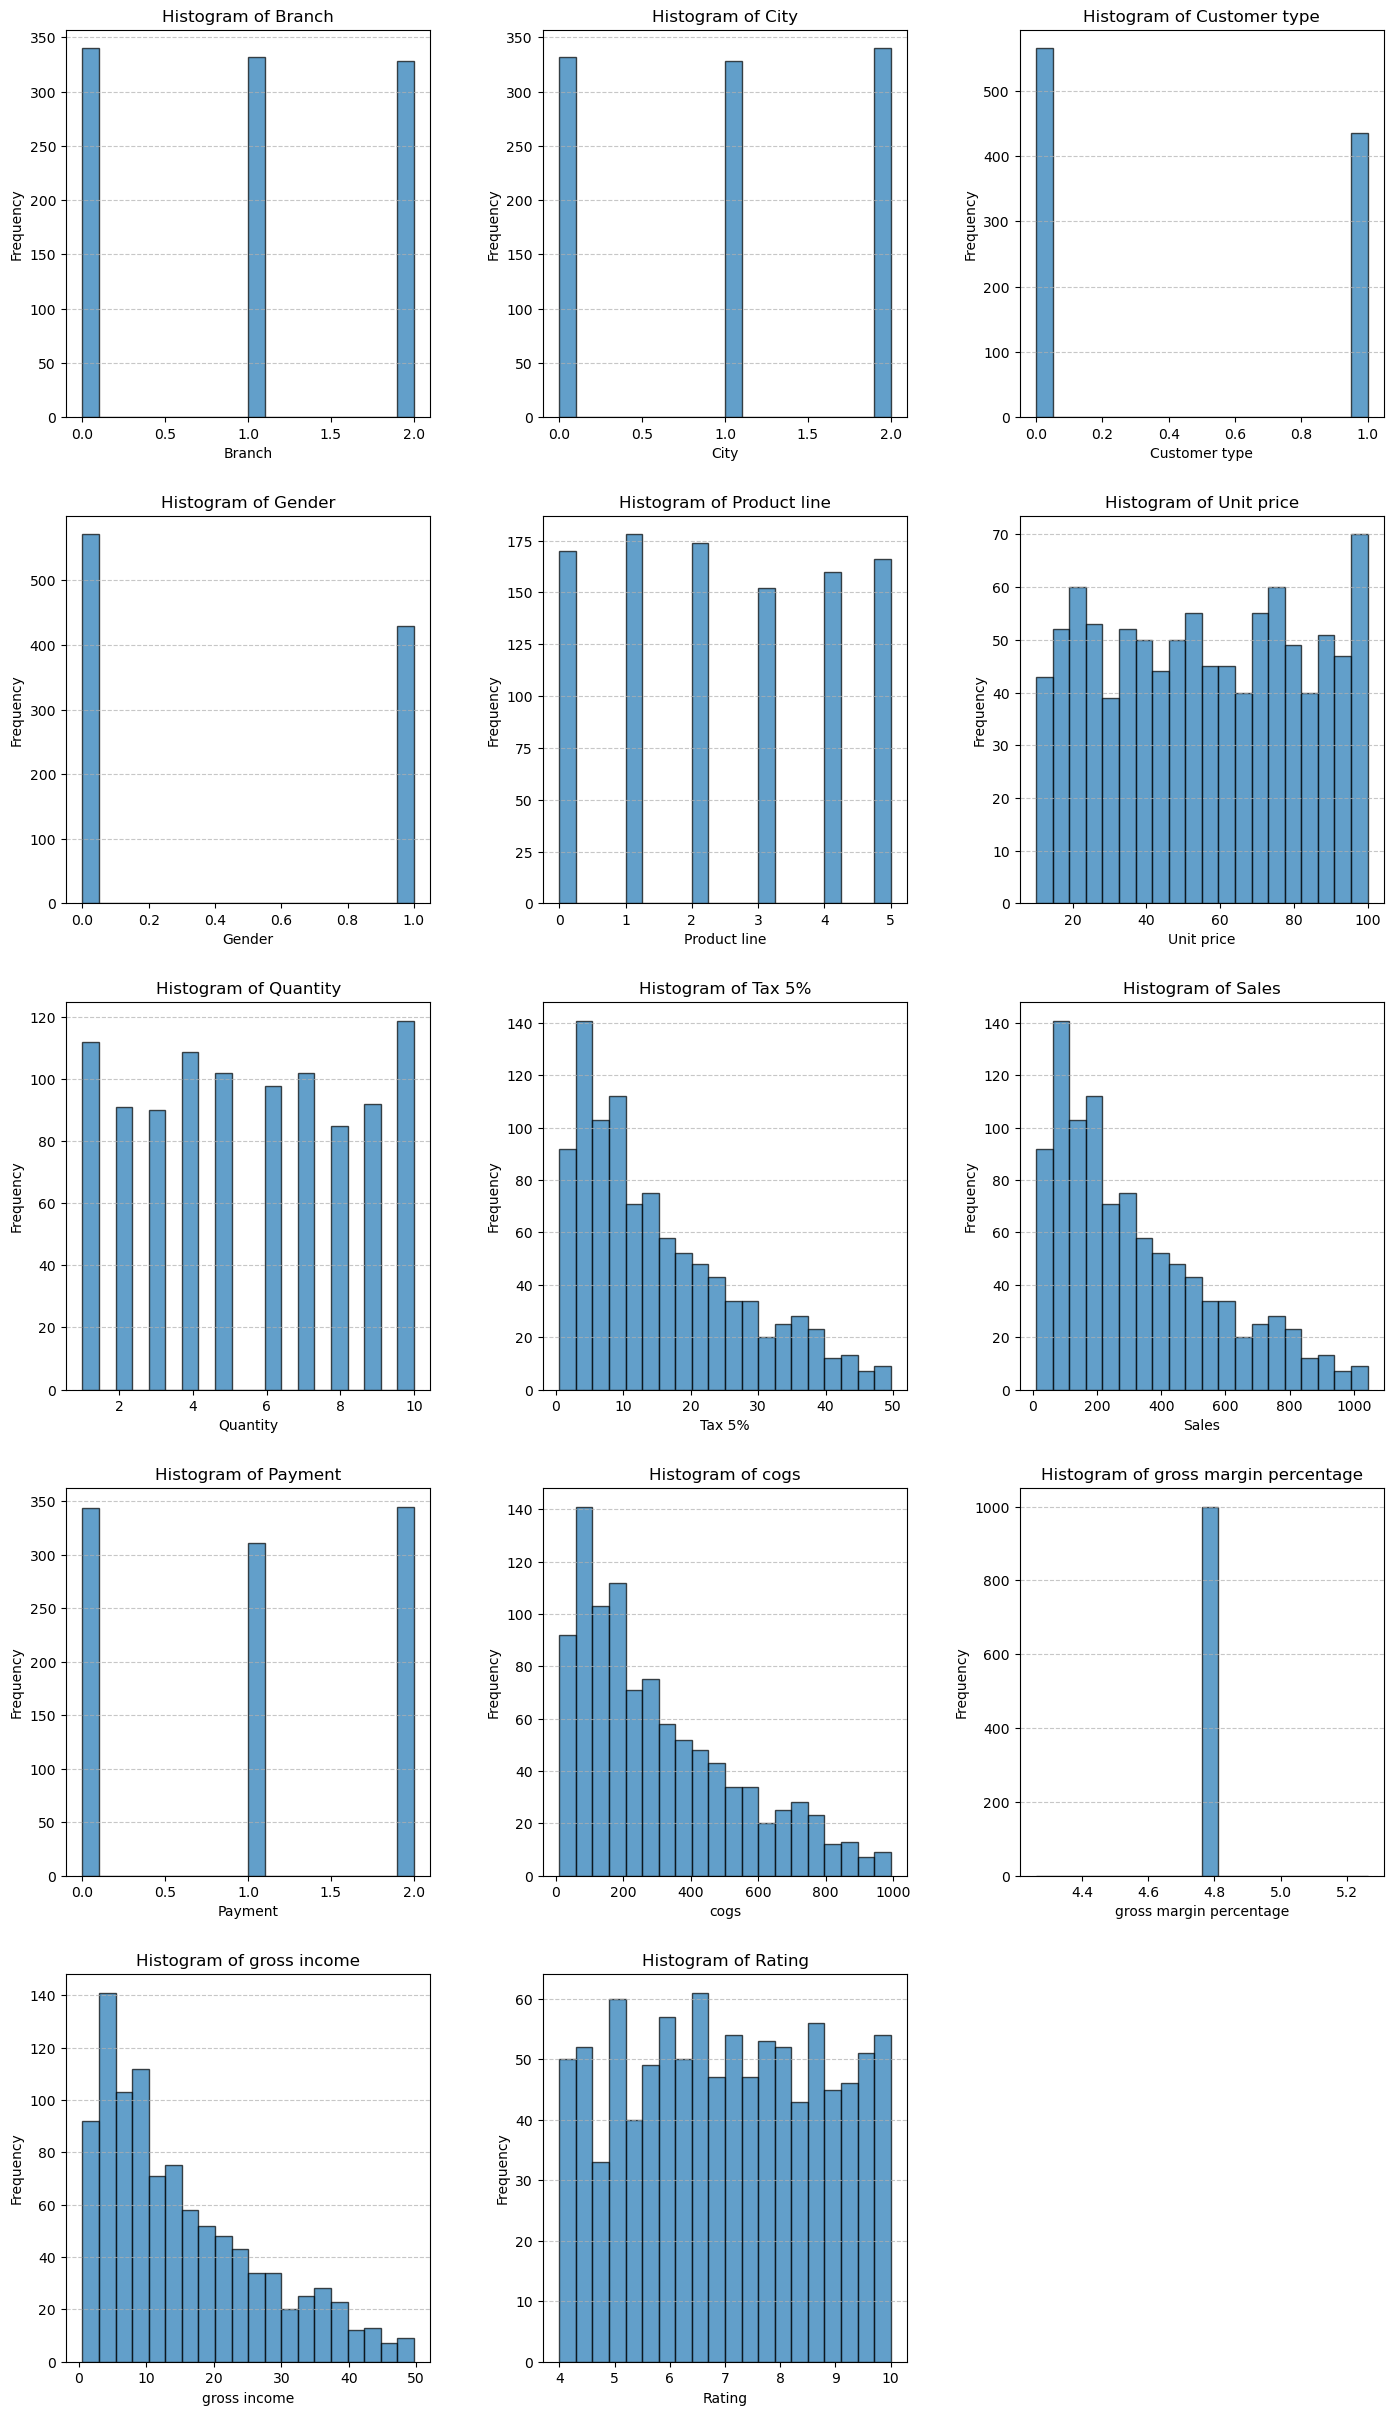

In [14]:
numerical_columns = supermarket_data.select_dtypes(include=['number']).columns.tolist()

num_cols = len(numerical_columns)
n_cols = 3  
n_rows = -(-num_cols // n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.tight_layout(pad=5.0)  

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(supermarket_data[col], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

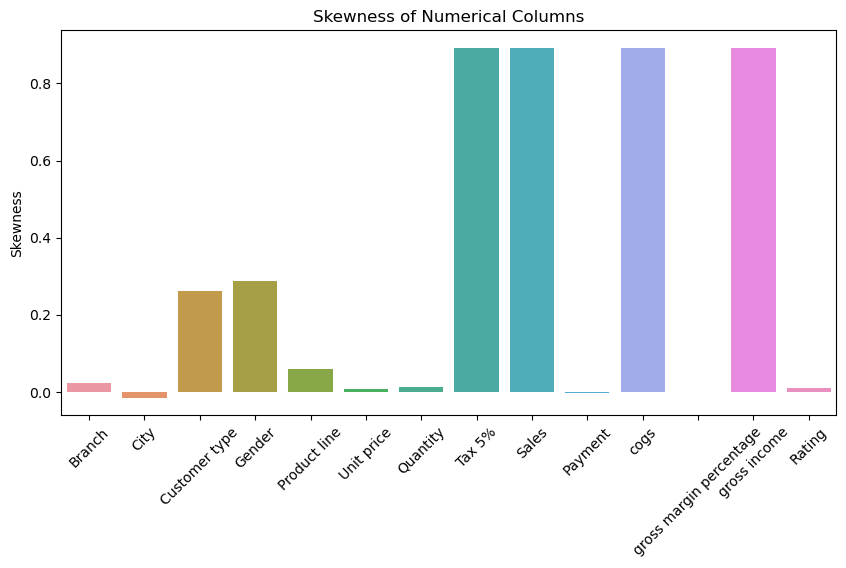

In [13]:
skewness_values = supermarket_data[numerical_columns].skew()
plt.figure(figsize=(10, 5))
sns.barplot(x=skewness_values.index, y=skewness_values.values)
plt.xticks(rotation=45)
plt.title('Skewness of Numerical Columns')
plt.ylabel('Skewness')
plt.show()

### Step 3: Plotting correlation matrix

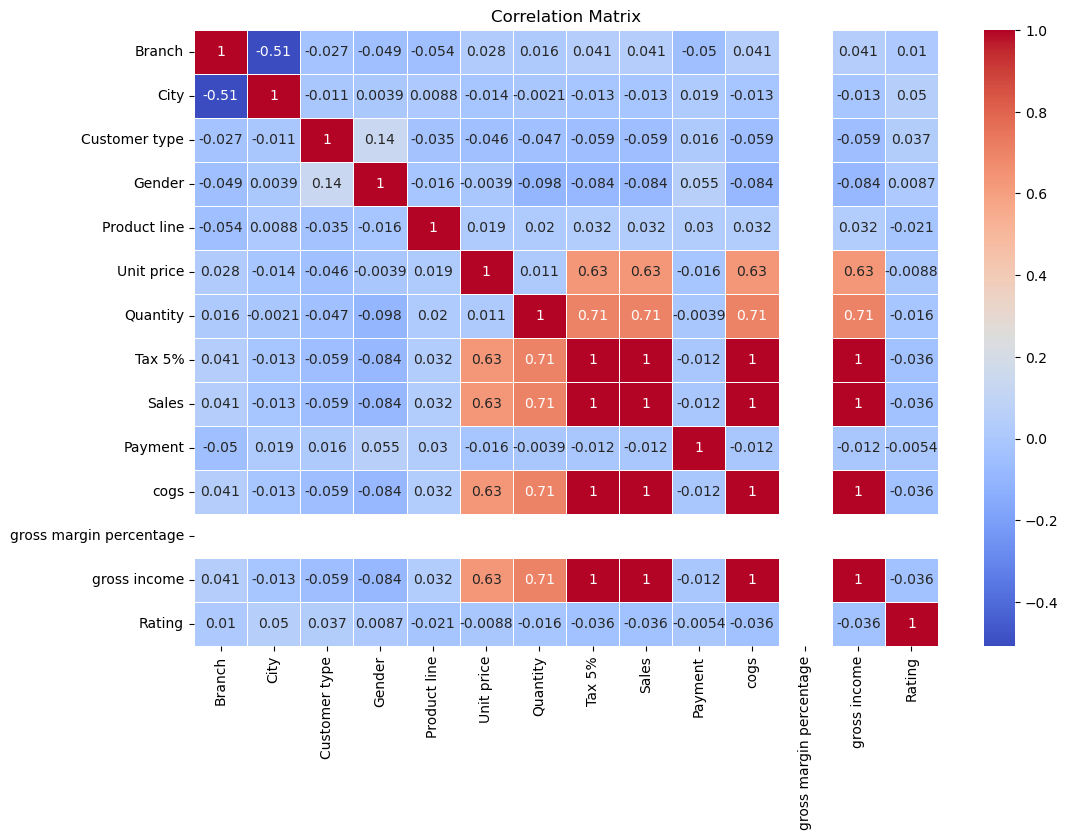

In [15]:
plt.figure(figsize=(12, 8))
correlation_matrix = supermarket_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Step 4: Feature-target separation and scaling

In [17]:
features = supermarket_data.drop('gross income', axis=1)
target = supermarket_data['gross income']
target

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    48.6900
997     1.5920
998     3.2910
999    30.9190
Name: gross income, Length: 1000, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

### Step 5: Applying Linear Regression, Decision Tree, Random Forest

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(random_state=42)
forest_regressor = RandomForestRegressor(random_state=42, n_estimators=100)

In [22]:
linear_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred_linear = linear_regressor.predict(X_test)
y_pred_tree = tree_regressor.predict(X_test)
y_pred_forest = forest_regressor.predict(X_test)

In [24]:
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)

print("Linear Regression: MSE =", linear_mse, ", R2 =", linear_r2)
print("Decision Tree Regressor: MSE =", tree_mse, ", R2 =", tree_r2)
print("Random Forest Regressor: MSE =", forest_mse, ", R2 =", forest_r2)

Linear Regression: MSE = 9.246242778746028e-29 , R2 = 1.0
Decision Tree Regressor: MSE = 0.017536164999999986 , R2 = 0.9998827111413401
Random Forest Regressor: MSE = 0.007820469278833708 , R2 = 0.9999476935854619
